# Project: Investigate the dog tweets dataset

# Data Wrangling

## Gather

In [1]:
import pandas as pd
import requests
import os
import tweepy
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [4]:
df2=pd.read_csv('image-predictions.tsv',sep="\t")
df2.head(2)
df2.shape

(2075, 12)

In [5]:
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
tweets_id=list(df2['tweet_id'])

In [7]:
start=timeit.timeit()
additional_info=[]
error=[]
i=0
for tweet_id in tweets_id:
    try:
        status = api.get_status(tweet_id,tweet_mode="extended")
        retweet_count=status.retweet_count
        favorite_count=status.favorite_count
        additional_info.append({"tweet_id":tweet_id,"retweet_count":retweet_count,"favorite_count":favorite_count})
    except:
        error.append(tweet_id) 
end=timeit.timeit()
print(end-start)

Rate limit reached. Sleeping for: 609
Rate limit reached. Sleeping for: 611


0.000473299999921295


In [8]:
error

[680055455951884288,
 754011816964026368,
 779123168116150273,
 802247111496568832,
 829374341691346946,
 837012587749474308,
 837366284874571778,
 842892208864923648,
 844704788403113984,
 851953902622658560,
 861769973181624320,
 872261713294495745,
 873697596434513921,
 888202515573088257]

In [9]:
df3=pd.DataFrame(additional_info,columns=['tweet_id','retweet_count','favorite_count'])

In [10]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,666020888022790149,472,2455
1,666029285002620928,43,121
2,666033412701032449,43,117
3,666044226329800704,134,276
4,666049248165822465,41,99


## Assess

In [11]:
df1[['rating_numerator','rating_denominator']].query('rating_denominator!=10').sample(5)

,rating_numerator,rating_denominator
516,24,7
1433,44,40
1663,20,16
784,9,11
1254,80,80


In [12]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [215]:
df1.query("tweet_id==740373189193256964")[['text','rating_numerator']]

,text,rating_numerator
1068,"After so many requests, this is Bretagne. She ...",9


9/11 is not rating, it's the date. Rating_numerator should be 14.

In [165]:
df1.query('(doggo!="None")&(pupper!="None")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


Some of the rows have more than one stage.

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,666020888022790149,472,2455
1,666029285002620928,43,121
2,666033412701032449,43,117
3,666044226329800704,134,276
4,666049248165822465,41,99


In [37]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.061000e+03,2061.000000,2061.000000
mean,7.378612e+17,2638.567686,8091.331393
std,6.755694e+16,4611.502210,12222.690245
min,6.660209e+17,11.000000,0.000000
25%,6.762636e+17,562.000000,1542.000000
50%,7.113638e+17,1245.000000,3561.000000
75%,7.928838e+17,3027.000000,10106.000000
max,8.924206e+17,79189.000000,158686.000000


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 3 columns):
tweet_id          2061 non-null int64
retweet_count     2061 non-null int64
favorite_count    2061 non-null int64
dtypes: int64(3)
memory usage: 48.4 KB


In [39]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality

#### df1 table
* Data type of "in_reply_to_status_id" is float.
* Data type of "in_reply_to_user_id" is float.
* Data type of "retweeted_status_id" is float.
* Data type of "retweeted_status_user_id" is float.
* Data types of "timestamp" is string.
* Data types of "retweeted_status_timestamp" is string.
* Wrong rating numerator and denominator extracted from the "text" column.
* Wrong stages extracted from the "text" column.
* Null represented as None in dog stages columns.
* Missing values in the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", and "retweeted_status_user_id" columns.

#### df2 table
* Some of the dog breeds are not all lower cases.

### Tidiness

#### df1 table
* Each variable doesn't form a column. Column "doggo","floofer","pupper","puppo" are representing one variable, which is the stage of the dog.
* Each type of observational unit doesn't forms a table. Separate df1 into retweet information, reply information, and dog inforamtion tables.

## Data Cleaning

In [173]:
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

### ***A.<br>a) Change the data types of "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", and "retweeted_status_user_id" into integer.<br> b) Change the data types of "timestamp" and "retweeted_status_timestamp" into datetime.<br>c) Take the retweet columns and reply columns out od df1_clean to get rid of the missing values in these columns.***

### Define

Create new tables "retweet" and "reply" that have the info of retweets and replies in df1_clean repectively, then change the data type of certain columns.

### Code

In [174]:
# Check if in_reply_to_status_id and in_reply_to_user_id have records on the same tweet.
df1_clean[((df1_clean['in_reply_to_status_id'].notnull())&(df1_clean['in_reply_to_user_id'].notnull()))].shape

(78, 17)

In [175]:
# Create a new table called reply to store information of replies. And change the data types.
reply=pd.DataFrame()
df1_clean_sub=df1_clean[((df1_clean['in_reply_to_status_id'].notnull())&(df1_clean['in_reply_to_user_id'].notnull()))]
reply[['tweet_id','in_reply_to_status_id','in_reply_to_user_id']]=df1_clean_sub[['tweet_id','in_reply_to_status_id','in_reply_to_user_id']]
reply[['in_reply_to_status_id','in_reply_to_user_id']]=reply[['in_reply_to_status_id','in_reply_to_user_id']].astype(np.int64)   
reply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 3 columns):
tweet_id                 78 non-null int64
in_reply_to_status_id    78 non-null int64
in_reply_to_user_id      78 non-null int64
dtypes: int64(3)
memory usage: 2.4 KB


In [176]:
# Create a new table called retweet to store information about retweets.
# Change the data types.
retweet=pd.DataFrame()
df1_clean_sub2=df1_clean[((df1_clean['retweeted_status_id'].notnull())&(df1_clean['retweeted_status_user_id'].notnull())&(df1_clean['retweeted_status_timestamp'].notnull()))]
retweet[['tweet_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']]=df1_clean_sub2[['tweet_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']]
retweet[['retweeted_status_id','retweeted_status_user_id']]=retweet[['retweeted_status_id','retweeted_status_user_id']].astype(np.int64)
retweet[['retweeted_status_timestamp']]=pd.to_datetime(retweet['retweeted_status_timestamp'])
retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 4 columns):
tweet_id                      181 non-null int64
retweeted_status_id           181 non-null int64
retweeted_status_user_id      181 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 7.1 KB


In [177]:
# Change the datatype of timestamp in df1.
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

### Test

In [178]:
reply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 3 columns):
tweet_id                 78 non-null int64
in_reply_to_status_id    78 non-null int64
in_reply_to_user_id      78 non-null int64
dtypes: int64(3)
memory usage: 2.4 KB


In [179]:
retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 4 columns):
tweet_id                      181 non-null int64
retweeted_status_id           181 non-null int64
retweeted_status_user_id      181 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 7.1 KB


In [180]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

### B.<br>***a) Delete the unecessary rows in df1_clean that are retweets or without images.<br>b) Lower-case all the dog breeds.***


### Define

Merge df1_clean and df2_clean in the way of "inner". Delete rows that are retweets, meaning there columns related with retweets are not NaN. And then delete the columns of retweets.
<br>Lower-case all the strings of dog breeds.
<br>Ps.Adding a new column  called "breed" in df1_clean is not a step of data cleaning. I did it here just for the convenience of analysis in the future.

### Code

In [181]:
# Get the breed of each image, if in p1 test gives a dog, then the breed will be the result of p1, otherwise, we look at the result of p2 or p3.
breeds=[]
for i in range (df2_clean.shape[0]):
    if df2_clean.iloc[i].p1_dog==True:
        breed=df2_clean.iloc[i].p1
    elif df2_clean.iloc[i].p2_dog==True:
        breed=df2_clean.iloc[i].p2
    elif df2_clean.iloc[i].p3_dog==True:
        breed=df2_clean.iloc[i].p3   
    else:
        breed="Others"
    breeds.append(breed)

In [182]:
# Add the breed as a column in df2_clean.
df2_clean['breed']=breeds

In [183]:
df2_clean.breed=df2_clean.breed.str.lower()

In [184]:
# Get the records that have images.
df1_clean=df1_clean.merge(df2_clean[['tweet_id','breed']],on="tweet_id",how="inner")

In [185]:
# Delete the records that are retweets.
df1_clean.drop(df1_clean[df1_clean["retweeted_status_id"].notnull()].index,axis=0,inplace=True)

In [186]:
# Reset the index
df1_clean.reset_index(drop=True,inplace=True)

In [187]:
# Delete the columns "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","in_reply_to_status_id","in_reply_to_user_id"
df1_clean.drop(["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"],axis=1,inplace=True)

In [188]:
df1_clean.drop(["in_reply_to_status_id","in_reply_to_user_id"],axis=1,inplace=True)

### Test

In [189]:
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,others
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,basset
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,chesapeake_bay_retriever
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,appenzeller
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,pomeranian
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,irish_terrier
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,pembroke


### C.***Correct the wrong rating numerator and denominator extracted from the "text" column.***

### Define

Extract all the matches that has "[0-9]+/[0-9]+" pattern. Records that have only one match can be considered right. Records that have more than one matches might be extracted incorrectly before.
Find out all records that has more than one matches, read the its "text" column again to fix the rating.
Get the average rating if the record has more than one ratings.

### Code

In [190]:
# Extract all matches from the "text" column.
rating=df1_clean.text.str.extractall('([0-9]+/[0-9]+)')
rating=rating.unstack()

In [191]:
# Select all columns with over 1 match. Some of the original rating_numerator and rating_denominator were collected by the first match, which are sometimes not the right ones. Those have only one match is right.
rating[((rating[0,1].notnull()) | (rating[0,2].notnull()))]

0              
match      0      1      2
555    12/10  11/10    NaN
749    10/10   7/10    NaN
800     9/11  14/10    NaN
891     4/20  13/10    NaN
925    50/50  11/10    NaN
941    10/10   8/10    NaN
1062    9/10   2/10    NaN
1152    4/10  13/10    NaN
1157   10/10   5/10    NaN
1192    5/10  10/10    NaN
1207   10/10   6/10    NaN
1218   11/10  10/10    NaN
1328    7/11  10/10    NaN
1450   10/10  11/10    NaN
1484   10/10   7/10    NaN
1546   10/10   4/10    NaN
1550    5/10   8/10    NaN
1615    8/10  11/10    NaN
1655   10/10   7/10  12/10
1708   11/10   8/10    NaN
1757   11/10   8/10    NaN
1820   10/10   7/10    NaN
1857    8/10   1/10    NaN
1902   10/10   4/10    NaN
1911    7/10   8/10    NaN
1944   10/10  10/10    NaN
1973     1/2   9/10    NaN

In [192]:
# Get the rows that has more than one match.
rating[((rating[0,1].notnull()) | (rating[0,2].notnull()))].index

Int64Index([ 555,  749,  800,  891,  925,  941, 1062, 1152, 1157, 1192, 1207,
            1218, 1328, 1450, 1484, 1546, 1550, 1615, 1655, 1708, 1757, 1820,
            1857, 1902, 1911, 1944, 1973],
           dtype='int64')

* Rows that has more than one rating.

In [194]:
# index=555, the text gives two ratings, let's get the average rating.
df1_clean.at[555,'text']
df1_clean.at[555,'rating_numerator']=(12+11)/2
df1_clean.at[555,'rating_denominator']=10

In [195]:
# index=749, the text gives two ratings, let's get the average rating.
df1_clean.at[749,'text']
df1_clean.at[749,'rating_numerator']=(10+7)/2
df1_clean.at[749,'rating_denominator']=10

In [196]:
df1_clean.at[941,'text']
df1_clean.at[941,'rating_numerator']=(10+8)/2
df1_clean.at[941,'rating_denominator']=10

In [197]:
df1_clean.at[1062,'text']
df1_clean.at[1062,'rating_numerator']=(9+2)/2
df1_clean.at[1062,'rating_denominator']=10

In [198]:
df1_clean.at[1157,'text']
df1_clean.at[1157,'rating_numerator']=(10+5)/2
df1_clean.at[1157,'rating_denominator']=10

In [199]:
df1_clean.at[1192,'text']
df1_clean.at[1192,'rating_numerator']=(5+10)/2
df1_clean.at[1192,'rating_denominator']=10

In [200]:
df1_clean.at[1207,'text']
df1_clean.at[1207,'rating_numerator']=(6+10)/2
df1_clean.at[1207,'rating_denominator']=10

In [201]:
df1_clean.at[1218,'text']
df1_clean.at[1218,'rating_numerator']=(11+10)/2
df1_clean.at[1218,'rating_denominator']=10

In [202]:
df1_clean.at[1450,'text']
df1_clean.at[1450,'rating_numerator']=(11+10)/2
df1_clean.at[1450,'rating_denominator']=10

In [203]:
df1_clean.at[1484,'text']
df1_clean.at[1484,'rating_numerator']=(10+7)/2
df1_clean.at[1484,'rating_denominator']=10

In [204]:
df1_clean.at[1546,'text']
df1_clean.at[1546,'rating_numerator']=(10+4)/2
df1_clean.at[1546,'rating_denominator']=10

In [205]:
df1_clean.at[1550,'text']
df1_clean.at[1550,'rating_numerator']=(5+8)/2
df1_clean.at[1550,'rating_denominator']=10

In [206]:
df1_clean.at[1615,'text']
df1_clean.at[1615,'rating_numerator']=(11+8)/2
df1_clean.at[1615,'rating_denominator']=10

In [207]:
df1_clean.at[1708,'text']
df1_clean.at[1708,'rating_numerator']=(11+8)/2
df1_clean.at[1708,'rating_denominator']=10

In [208]:
df1_clean.at[1757,'text']
df1_clean.at[1757,'rating_numerator']=(11+8)/2
df1_clean.at[1757,'rating_denominator']=10

In [209]:
df1_clean.at[1820,'text']
df1_clean.at[1820,'rating_numerator']=(10+7)/2
df1_clean.at[1820,'rating_denominator']=10

In [210]:
df1_clean.at[1857,'text']
df1_clean.at[1857,'rating_numerator']=(8+1)/10
df1_clean.at[1857,'rating_denominator']=10

In [211]:
df1_clean.at[1902,'text']
df1_clean.at[1902,'rating_numerator']=(10+4)/2
df1_clean.at[1902,'rating_denominator']=10

In [212]:
df1_clean.at[1911,'text']
df1_clean.at[1911,'rating_numerator']=(7+8)/2
df1_clean.at[1911,'rating_denominator']=10

* Rows that selected wrong match at first.

In [217]:
df1_clean.at[800,'text']
df1_clean.at[800,'rating_numerator']=14
df1_clean.at[800,'rating_denominator']=10

In [219]:
df1_clean.at[891,'text']
df1_clean.at[891,'rating_numerator']=13
df1_clean.at[891,'rating_denominator']=10

In [220]:
df1_clean.at[925,'text']
df1_clean.at[925,'rating_numerator']=11
df1_clean.at[925,'rating_denominator']=10

In [221]:
df1_clean.at[1152,'text']
df1_clean.at[1152,'rating_numerator']=13
df1_clean.at[1152,'rating_denominator']=10

In [222]:
df1_clean.at[1328,'text']
df1_clean.at[1328,'rating_numerator']=10
df1_clean.at[1328,'rating_denominator']=10

In [223]:
df1_clean.at[1973,'text']
df1_clean.at[1973,'rating_numerator']=9
df1_clean.at[1973,'rating_denominator']=10

* Rows that don't need to be fixed.

In [224]:
# index=1655, the rating is the first one, no need to change.
df1_clean.at[1655,'text']
# index=1944, both two ratings are the same, no need to change.
df1_clean.at[1944,'text']

'These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1'

In [225]:
# After the modification, some of the rating_numerators are no longer integers.
df1_clean.rating_numerator=df1_clean.rating_numerator.astype(float)

### Test

In [226]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
breed                 1994 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(9)
memory usage: 202.6+ KB


### D.<br>***a) Correct the wrong stage extracted from text column.<br>b) Convert the None in stage columns into Null. <br>c) Combine four stage columns into one column, stage.***

### Define

Create a function to extract stage key words from the test column. Check the rows that have more than 1 stage. Fix the wrong stage info, give a multi-stage names to rows that do have more than one stage.

### Code

In [227]:
# Extract key words of stage in each cell of the text column. Convert the output into a dataframe.
stages=["doggo","floofer","pupper","puppo"]
fin_stage=[]
def get_stage(text):
    lt=[]
    for stage in stages:
        if stage in text:
            lt.append(stage)
        else:
            continue
    fin_stage.append(lt)
df1_clean.text.apply(get_stage)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1964    None
1965    None
1966    None
1967    None
1968    None
1969    None
1970    None
1971    None
1972    None
1973    None
1974    None
1975    None
1976    None
1977    None
1978    None
1979    None
1980    None
1981    None
1982    None
1983    None
1984    None
1985    None
1986    None
1987    None
1988    None
1989    None
1990    None
1991    None
1992    None
1993    None
Name: text, Length: 1994, dtype: object

In [228]:
fin_stage=pd.DataFrame(fin_stage)
fin_stage.head()

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


In [229]:
df1_clean['stage']=fin_stage[0]

In [230]:
#Get the index of rows that has more than one stage. And check the text column one by one.
fin_stage[fin_stage[1].notnull()].index

Int64Index([137, 148, 397, 419, 425, 510, 652, 704, 795, 841], dtype='int64')

* Wrong stage info extracted from the text column.

In [231]:
#Index=137"puppo" is extracted from the word "puppon"
df1_clean.at[137,'text']
df1_clean.at[137,'stage']="doggo"

In [232]:
df1_clean.at[148,'text']
df1_clean.at[148,'stage']="puppo"

In [233]:
df1_clean.at[425,'text']
df1_clean.at[425,'stage']="pupper"

* Two stages (doggo/pupper) exist. Name the stage with a new name "doggo_pupper".

In [234]:
df1_clean.at[397,'text']
df1_clean.at[397,'stage']="doggo_pupper"

In [235]:
df1_clean.at[652,"text"]
df1_clean.at[652,'stage']="doggo_pupper"

In [236]:
df1_clean.at[795,'text']
df1_clean.at[795,'stage']="doggo_pupper"

In [237]:
df1_clean.at[841,'text']
df1_clean.at[841,'stage']="doggo_pupper"

* No need to be fixed.

In [238]:
#Index=419, based on the text, it is at doggo stage, no need to change.
df1_clean.at[419,'text']

'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze'

In [239]:
df1_clean.at[510,'text']

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [240]:
#No stage info from the text.
df1_clean.at[704,'text']
df1_clean.at[704,'stage']=np.nan

In [241]:
#Drop the "doggo","floofer","pupper","puppo" columns.
df1_clean.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

### Test

In [242]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
breed                 1994 non-null object
stage                 325 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 155.9+ KB


In [243]:
df1_clean.stage.value_counts()

pupper          222
doggo            69
puppo            27
doggo_pupper      4
floofer           3
Name: stage, dtype: int64

### E.<br>***Fixed the extremely high ratings. (Discovered this when dealing with the first research question)***

### Define

Check all the strangely high ratings(rating_numerator/rating_denominator) in df1_clean and fix the problem.

### Code

In [244]:
df1_clean['rating']=df1_clean['rating_numerator']/df1_clean['rating_denominator']

In [245]:
df1_clean.rating.sort_values(ascending=False)

726     177.600000
1718     42.000000
503       7.500000
385       3.428571
553       2.700000
1374      2.600000
362       1.400000
455       1.400000
571       1.400000
113       1.400000
162       1.400000
49        1.400000
165       1.400000
634       1.400000
333       1.400000
64        1.400000
100       1.400000
681       1.400000
800       1.400000
786       1.400000
206       1.400000
95        1.400000
399       1.400000
119       1.400000
297       1.400000
253       1.400000
1280      1.400000
146       1.400000
131       1.400000
147       1.400000
           ...    
1880      0.300000
1943      0.300000
1547      0.300000
915       0.300000
1780      0.300000
965       0.300000
1592      0.300000
1584      0.300000
1574      0.300000
1167      0.300000
1106      0.300000
1021      0.300000
554       0.300000
1273      0.300000
1419      0.200000
1987      0.200000
1422      0.200000
1948      0.200000
1723      0.200000
1887      0.200000
1566      0.200000
1964      0.

Strange ratings at index=726, 1718, 503, 385, 553, 1374

* Wrong rating extracted from the text column.

In [246]:
#Index=503, a wrong rating extracted from text.
df1_clean.iloc[503].text
df1_clean.at[503,'rating_numerator']=9.75
df1_clean.at[503,'rating_denominator']=10
df1_clean.at[503,'rating']=9.75/10

In [247]:
df1_clean.iloc[553].text
df1_clean.at[553,'rating_numerator']=11.27
df1_clean.at[553,'rating_denominator']=10
df1_clean.at[553,'rating']=11.27/10

In [248]:
df1_clean.iloc[1374].text
df1_clean.at[1374,'rating_numerator']=11.26
df1_clean.at[1374,'rating_denominator']=10
df1_clean.at[1374,'rating']=11.26/10

* Correct rating extracted from the text column, but didn't make sense. Or no rating info provided in the text column. I decided to delete these rows.

In [249]:
df1_clean.iloc[726].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [250]:
df1_clean.iloc[1718].text

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [251]:
#Index=385, a wrong rating extracted from text, the text didn't provide information about ratings. This will cause a missing value in the rating columns. I decided to delete this row.
df1_clean.iloc[385].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [252]:
df1_clean.drop([726,1718,385],axis=0,inplace=True)

In [253]:
df1_clean.reset_index(drop=True,inplace=True)

### Test

In [254]:
df1_clean.shape

(1991, 11)

In [255]:
df1_clean.tail(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,breed,stage,rating
1989,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,redbone,None,0.7
1990,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,welsh_springer_spaniel,None,0.8


In [256]:
df1_clean.rating.sort_values(ascending=False)

278     1.4
332     1.4
275     1.4
49      1.4
64      1.4
318     1.4
206     1.4
147     1.4
146     1.4
784     1.4
798     1.4
131     1.4
398     1.4
324     1.4
633     1.4
548     1.4
36      1.4
113     1.4
256     1.4
21      1.4
333     1.4
153     1.4
313     1.4
297     1.4
165     1.4
454     1.4
680     1.4
570     1.4
1278    1.4
162     1.4
       ... 
1877    0.3
1969    0.3
1353    0.3
1940    0.3
553     0.3
1165    0.3
1572    0.3
913     0.3
1019    0.3
1485    0.3
1777    0.3
1271    0.3
1545    0.3
1841    0.3
1875    0.2
1720    0.2
1884    0.2
1984    0.2
1420    0.2
1417    0.2
1564    0.2
1961    0.2
1945    0.2
1973    0.1
1517    0.1
1897    0.1
1732    0.1
754     0.0
1854    0.0
235     0.0
Name: rating, Length: 1991, dtype: float64

# Exploratory Data Analysis

## Research Question 1: What stage of a dog has  higher ratings on average.

In [257]:
avg_matrix=df1_clean.groupby('stage').rating.mean()
avg_matrix

stage
doggo           1.173913
doggo_pupper    1.200000
floofer         1.266667
pupper          1.055973
puppo           1.211111
Name: rating, dtype: float64

Stage of "doggo_pupper" can be both "doggo" and "pupper".

In [258]:
#Calculate the average ratings of doggo and pupper.
doggo_avg=df1_clean.query('(stage=="doggo")|(stage=="doggo_pupper")').rating.sum()/df1_clean.query('(stage=="doggo")|(stage=="doggo_pupper")').shape[0]
pupper_avg=df1_clean.query('(stage=="pupper")|(stage=="doggo_pupper")').rating.sum()/df1_clean.query('(stage=="pupper")|(stage=="doggo_pupper")').shape[0]

In [259]:
print(pupper_avg),print(doggo_avg)

1.0585221238938054
1.1753424657534246


(None, None)

Based on the results of the above two commands, we can get the average ratings of all stages.

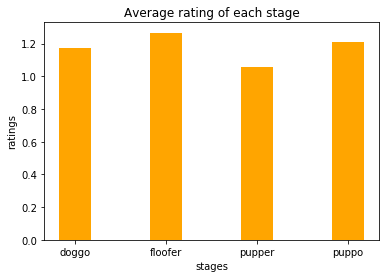

In [260]:
avg=[doggo_avg,avg_matrix[2],pupper_avg,avg_matrix[4]]
labels=['doggo','floofer','pupper','puppo']
location=np.arange(4)
plt.bar(location,avg,width=0.35, color="orange");
plt.xticks(location,labels);
plt.ylabel("ratings");
plt.xlabel("stages");
plt.title("Average rating of each stage");

***Conclusion: Dogs of floofer stage have higher ratings on average than dogs of other stages.***

## Research Question 2: What breed of a dog gets higher ratings on average.

In [261]:
df1_clean.breed.nunique()

114

In [262]:
breed_rank=df1_clean.groupby("breed").rating.mean().sort_values(ascending=False)

In [263]:
breed_top10=list(breed_rank.head(10).index)
breed_top10_ratings=list(breed_rank.head(10).values)

In [264]:
breed_top10

['bouvier_des_flandres',
 'saluki',
 'briard',
 'tibetan_mastiff',
 'border_terrier',
 'silky_terrier',
 'standard_schnauzer',
 'gordon_setter',
 'irish_setter',
 'samoyed']

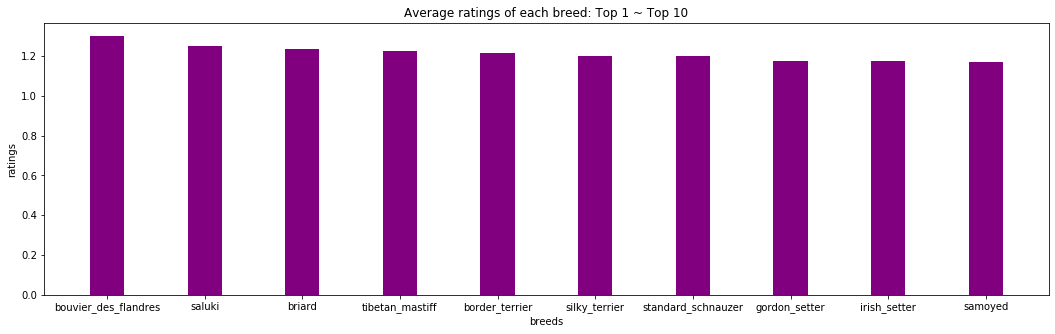

In [265]:
ind=np.arange(10)
plt.subplots(figsize=(18,5));
plt.bar(ind,breed_top10_ratings,width=0.35,color="purple");
plt.xticks(ind,breed_top10);
plt.ylabel("ratings");
plt.xlabel("breeds");
plt.title('Average ratings of each breed: Top 1 ~ Top 10');

***Conclusion: The breed of bouvier des flandres, saluki, and briard have higher ratings on average.***

## Research Question 3: What is the relationship between dog ratings and their favorite counts and retweet counts?

In [266]:
df3_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,666020888022790149,472,2455
1,666029285002620928,43,121


In [267]:
df3_clean=df3_clean.merge(df1_clean[['tweet_id','rating']],on="tweet_id",how="inner")

In [268]:
df3_clean.head()

,tweet_id,retweet_count,favorite_count,rating
0,666020888022790149,472,2455,0.8
1,666029285002620928,43,121,0.7
2,666033412701032449,43,117,0.9
3,666044226329800704,134,276,0.6
4,666049248165822465,41,99,0.5


In [269]:
df3_clean.shape

(1984, 4)

In [270]:
x1=np.array(df3_clean.retweet_count)
x2=np.array(df3_clean.favorite_count)
y=np.array(df3_clean.rating)

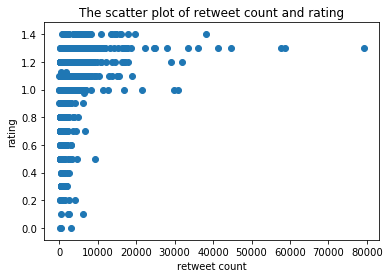

In [271]:
plt.scatter(x1,y);
plt.xlabel('retweet count');
plt.ylabel('rating');
plt.title('The scatter plot of retweet count and rating');

In [272]:
np.corrcoef(x1,y)

array([[1.        , 0.29153175],
       [0.29153175, 1.        ]])

A low correlation between retweet_count and rating.

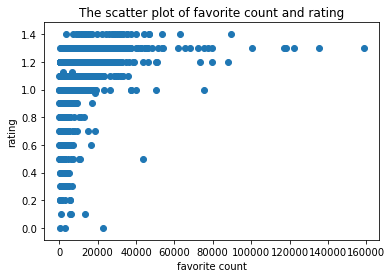

In [273]:
plt.scatter(x2,y);
plt.xlabel('favorite count');
plt.ylabel('rating');
plt.title('The scatter plot of favorite count and rating');

In [274]:
np.corrcoef(x2,y)

array([[1.        , 0.38406049],
       [0.38406049, 1.        ]])

A low correlation betweet favorite count and rating.

In [275]:
import statsmodels.api as sm

In [276]:
df3_clean['intercept']=1
lm=sm.OLS(df3_clean['rating'],df3_clean[['intercept','retweet_count','favorite_count']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     215.6
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.91e-85
Time:                        00:42:27   Log-Likelihood:                 390.26
No. Observations:                1984   AIC:                            -774.5
Df Residuals:                    1981   BIC:                            -757.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.9888      0.005    180.766      0.000       0.978       1.000
retweet_count  -2.347e-05    2.7e-06     -8.683      0.000   -2.88e-05   -1.82e-05
favorite_count  1.472e-05   9.79e-07     15.040      0.000    1.28e-05    1.66e-05
==============================================================================
Omnibus:                      709.638   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2691.165
Skew:                          -1.737   Prob(JB):                         0.00
Kurtosis:                       7.526   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

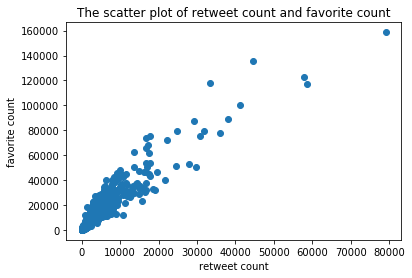

In [277]:
plt.scatter(np.array(df3_clean['retweet_count']),np.array(df3_clean['favorite_count']));
plt.xlabel("retweet count");
plt.ylabel("favorite count");
plt.title("The scatter plot of retweet count and favorite count");

A positive linear relationship between retweet count and favorite count.

***Conclusion: Ratings and favorite_counts & retweet_counts has a relatively weak linear relationship. The linear model is not fittng well.
<br>Retweet count and favorite count are highly correlated.***

## Research Question 4: Are tweets with higher rating dogs more likely to have more favorite count and retweet count?

***Null hypothesis***: Tweets have higher rating dogs have no more favorite counts than those have lower rating dogs.
<br>***Alternative hypothesis***:Tweets have higher rating dogs have more favorite counts.
<br>***H0***:fav_h - fav_l<=0
<br>***H1***:fav_h - fav_l>0

In [278]:
np.sort(df3_clean.rating.unique())

array([0.   , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  ,
       0.9  , 0.975, 1.   , 1.1  , 1.126, 1.127, 1.2  , 1.3  , 1.4  ])

In [279]:
#I separate ratings into two groups, ratings over 1 are collected in the high_rating group, and ratings below 1 are collected in the low_rating group.
df3_clean['group']=pd.cut(df3_clean['rating'],[0,1,1.4],labels=["low","high"])

In [280]:
df3_clean.group.unique()

[low, high, NaN]
Categories (2, object): [low < high]

In [281]:
df3_clean.head()

,tweet_id,retweet_count,favorite_count,rating,intercept,group
0,666020888022790149,472,2455,0.8,1,low
1,666029285002620928,43,121,0.7,1,low
2,666033412701032449,43,117,0.9,1,low
3,666044226329800704,134,276,0.6,1,low
4,666049248165822465,41,99,0.5,1,low


In [282]:
fav_h_obs=df3_clean.query('group=="high"').favorite_count.mean()
fav_l_obs=df3_clean.query('group=="low"').favorite_count.mean()
diff_obs=fav_h_obs-fav_l_obs
diff_obs

8919.95848501205

In [283]:
diffs=[]
for _ in range(10000):
    sample=df3_clean.sample(500)
    fav_h_sample=sample.query('group=="high"').favorite_count.mean()
    fav_l_sample=sample.query('group=="low"').favorite_count.mean()
    diff=fav_h_sample-fav_l_sample
    diffs.append(diff)

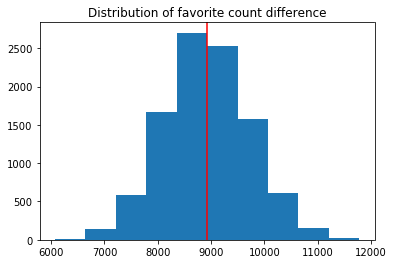

In [284]:
diffs=np.array(diffs)
plt.hist(diffs);
plt.axvline(x=diff_obs,color="red");
plt.title("Distribution of favorite count difference");

In [285]:
diffs.mean()

8922.787101470078

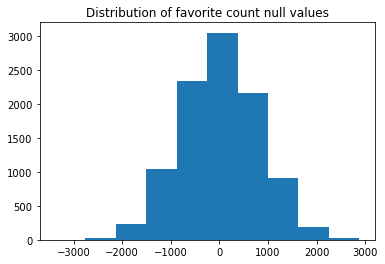

In [286]:
null_mean=0
null_val=np.random.normal(null_mean,diffs.std(),10000)
plt.hist(null_val);
plt.title("Distribution of favorite count null values");

In [287]:
p_value=(null_val>diff_obs).mean()
p_value

0.0

***Conclusion 1: The p-value we calculated is 0, which means we can reject the null hypothesis. Therefore, we can say tweets with higher rating dogs are more likely to have more favorite counts.***

***Null hypothesis***: Tweets have higher rating dogs have no more retweet counts than those have lower rating dogs.
<br>***Alternative hypothesis***:Tweets have higher rating dogs have more retweet counts.
<br>***H0***:ret_h - ret_l<=0
<br>***H1***:ret_h - ret_l>0

In [288]:
diffs_ret=[]
for _ in range(10000):
    sample=df3_clean.sample(500)
    ret_h_sample=sample.query('group=="high"').retweet_count.mean()
    ret_l_sample=sample.query('group=="low"').retweet_count.mean()
    diff_ret=ret_h_sample-ret_l_sample
    diffs_ret.append(diff_ret)

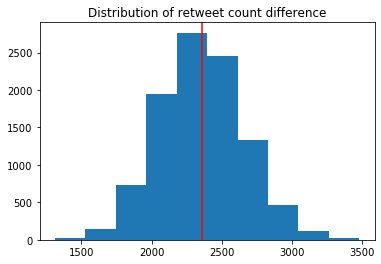

In [289]:
ret_h_obs=df3_clean.query('group=="high"').retweet_count.mean()
ret_l_obs=df3_clean.query('group=="low"').retweet_count.mean()
diff_ret_obs=ret_h_obs-ret_l_obs
diffs_ret=np.array(diffs_ret)
plt.hist(diffs_ret);
plt.axvline(x=diff_ret_obs,color="red");
plt.title("Distribution of retweet count difference");

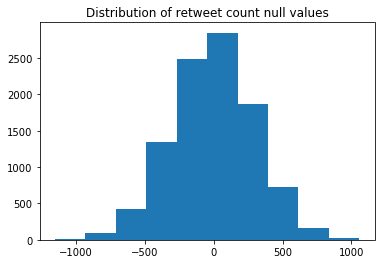

In [290]:
null_mean=0
null_val_ret=np.random.normal(null_mean,diffs_ret.std(),10000)
plt.hist(null_val_ret);
plt.title("Distribution of retweet count null values");

In [291]:
p_value_ret=(null_val_ret>diff_ret_obs).mean()
p_value_ret

0.0

***Conclusion 2: The p-value we calculated is 0, which means we can reject the null hypothesis. Therefore, we can say tweets with higher rating dogs are more likely to have more retweet counts.***

# Final Part: Save the files

In [292]:
df1_clean.to_csv('twitter_archive_master.csv',index=False)

In [293]:
df3_clean.to_csv('influence_to_public.csv',index=False)